In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from nntorch import neuralnet

In [3]:
# Load iris dataset and split into train and test.
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [5]:
# Normalize and convert to Pytorch objects.
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

In [6]:
# Build Pytorch dataset and dataloader.
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
# Define model using my Pytorch implementation of neural net.
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = neuralnet(input_size, hidden_size, output_size)

In [11]:
# Define loss function and optimizer
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# Train the model.
n_epochs = 100
loss_hist = [0]*n_epochs
acc_hist = [0]*n_epochs
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        preds = model(x_batch)
        loss = loss_fn(preds, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(preds, dim=1) == y_batch).float()
        acc_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    acc_hist[epoch] /= len(train_dl.dataset)

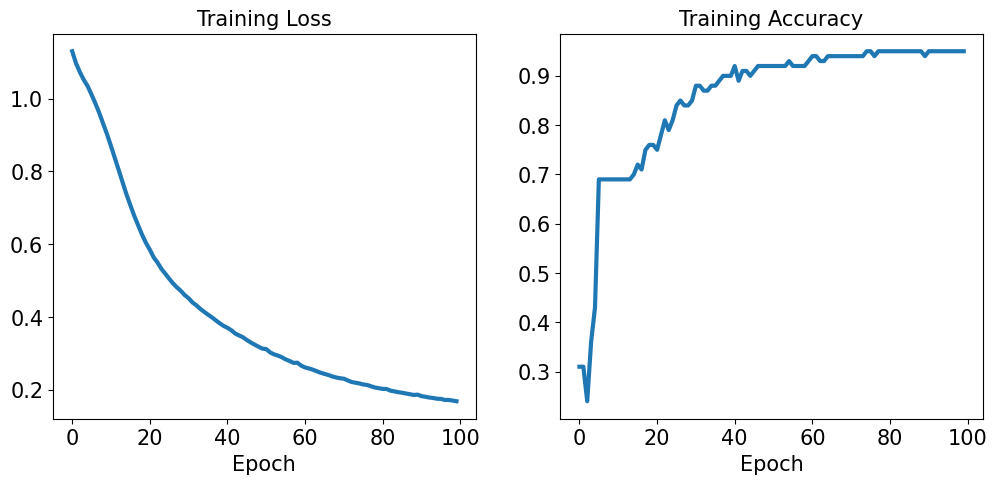

In [17]:
# Plot the training loss and accuracy.
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(acc_hist, lw=3)
ax.set_title('Training Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
# Evaluate model on the test set.
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
preds_test = model(X_test_norm)
correct = (torch.argmax(preds_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9800
